You will use the relaxation method to solve for the potential of a series of charged particles. In the github under HOMEWORK5 there is a datafile names “particles.dat.” Inside this datafile is a set of (x,y) coordinates for a series of charged particles, all with charge equal to the electron charge. The range of coordinates is [0,100]. As with example 9.2 in Newman, these particles are placed in a box that is grounded on all 4 sides.

(a) Using the cloud-in-cell technique, assign the charges to a two-dimensional grid of size [0,M] per side, with M=100. The centers of each grid cell (i,j) is (i+0.5,j+0.5). Produce an image of the charge density field.


(b) Use standard relaxation method to solve for Poisson’s equation. Produce an image showing the resulting potential field. Note the number of iterations it takes to converge. Use the same convergence criterion as the example in Newman, such that the maximum difference for any cell in the grid between the current and prior step is 1.0E-10.

(c) Now use the Guass-Seidel overrelaxation method to solve for Poisson’s equation. Determine the optimal value of the overrelaxation parameter ω, using one of the techniques discussed in class and in the chapter on nonlinear equations. Golden ratio search is a good example. Find the optimal value of ω to a precision of 0.001. Produce a plot showing how your answer for ω evolves with each step in your minimization process.


# Notes: Use relaxation method to solve the problem, and compare it to the values given in particles.dat

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
particles = np.loadtxt('../dat/particles.dat')

Text(0, 0.5, '$y$')

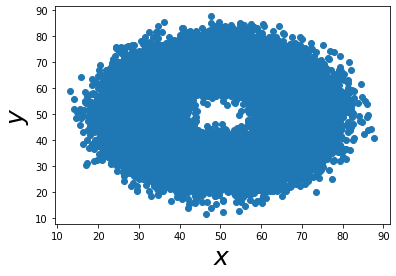

In [3]:
plt.scatter(particles[:,0],particles[:,1])
plt.xlabel("$x$",fontsize=25)
plt.ylabel("$y$",fontsize=25)

 The point cloud representation of the charged particles. One can understand this figure as each particle posessing a certain x y value, and plotted accordingly on a scatter plot. 
 
 
Next, we seek to represent these particles on a grid, leveraging the cloud-in-cell algorithm.

In [4]:
class Grid():
    def __init__(self,length,width):
        self.length = length
        self.width = width
        self.box = np.zeros([length,width])
    
    def CIC_interp(self,particles):
        """
        
        """
        for particle in particles:
            #closest values in X and y
            NNx = int(np.floor(particle[0]) ), int(np.ceil(particle[0]) )
            NNy = int(np.floor(particle[1])), int(np.ceil(particle[1]))
            
            contrib_lower_X = abs(1 - particle[0] + NNx[0])
            contrib_upper_X = 1 - contrib_lower_X

            contrib_lower_Y = abs(1 - particle[1] + NNy[0])
            contrib_upper_Y = 1 - contrib_lower_Y
            
            self.box[NNx[0]-1,NNy[0]-1] += contrib_lower_X*contrib_lower_Y
            self.box[NNx[0]-1,NNy[1]-1] += contrib_lower_X*contrib_upper_Y
            self.box[NNx[1]-1,NNy[0]-1] += contrib_upper_X*contrib_lower_Y
            self.box[NNx[1]-1,NNy[1]-1] += contrib_upper_X*contrib_upper_Y
            
        return self.box

In [7]:
grid = Grid(100,100)

Text(0, 0.5, '$y$')

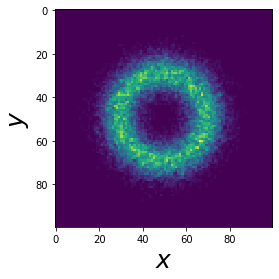

In [8]:
#plt.figure(figsize=(8,8))
plt.imshow(grid.CIC_interp(particles))
plt.xlabel("$x$",fontsize=25)
plt.ylabel("$y$",fontsize=25)

Now that the particles are in a grid space, there is the obvious advantage of now being able to use this grid to solve for a potential field, but an extra layer of value which is that we need not stop at the given boundaries! If we were truly interested, we could have designed the grid space to be much larger, and solved for the potential equation over a far larger region. The biggest drawback to doing so now is the extra layer of computation time demmanded to doing so, but later in this question, we will address different techniques for solving this sort of problem faster via. over-relaxation and Gauss-Seidel. 

In [37]:
cell = grid.CIC_interp(particles)
# Constants
M = 100
target = 1e-10   # Target accuracy
epsilon0 = 1 #8.85e-12

# Create arrays to hold potential values
phi = np.zeros([M,M],float)
phiprime = np.empty([M,M],float)

a = 1
# Main loop
delta = 1.0

rho = grid.CIC_interp(particles)
steps = 0
while delta > target:
    for i in range(0,M-1):
        for j in range(0,M-1):
        #    print(delta)
            phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 + (1/4 / epsilon0) * rho[i,j] 
            #calculate max difference        
            #swap the two arrays
            phi[i,j],phiprime[i,j] = phiprime[i,j],phi[i,j]
      #  print(np.mean(phi[i,:]))
    delta = np.max(abs(phi - phiprime))
    steps +=1
    
    if steps % 100 == 0:
        print("Steps = ", steps )
        print("Delta = ", delta)

Steps =  100
Delta =  57.70906640866542
Steps =  200
Delta =  50.82660486257191
Steps =  300
Delta =  46.78648191479988
Steps =  400
Delta =  41.706178683083635
Steps =  500
Delta =  37.05253088527752
Steps =  600
Delta =  33.03174540918553
Steps =  700
Delta =  29.57128721087065
Steps =  800
Delta =  26.5658389534874
Steps =  900
Delta =  23.927868538692564
Steps =  1000
Delta =  21.5916604596423
Steps =  1100
Delta =  19.50856840697088
Steps =  1200
Delta =  17.641989525065583
Steps =  1300
Delta =  15.96359765651141
Steps =  1400
Delta =  14.450778448546771
Steps =  1500
Delta =  13.084940132852353
Steps =  1600
Delta =  11.850409849357675
Steps =  1700
Delta =  10.733708122483222
Steps =  1800
Delta =  9.72306414070772
Steps =  1900
Delta =  8.80808388863079
Steps =  2000
Delta =  7.979515710401756
Steps =  2100
Delta =  7.229078633477911
Steps =  2200
Delta =  6.549331803718815
Steps =  2300
Delta =  5.933571483576088
Steps =  2400
Delta =  5.375747083839087
Steps =  2500
Delta = 

# Now use the Gauss-Seidel overrelaxation method to solve for Poisson’s equation. Determine the optimal value of the overrelaxation parameter ω, using one of the techniques discussed in class and in the chapter on nonlinear equations. Golden ratio search is a good example. Find the optimal value of ω to a precision of 0.001. Produce a plot showing how your answer for ω evolves with each step in your minimization process.


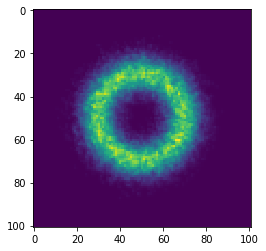

In [21]:
plt.imshow(phi)

In [20]:
M = 100
target = 1e-6   # Target accuracy
epsilon0 = 1 #8.85e-12

# Create arrays to hold potential values
phi = np.zeros([M,M],float)
phiprime = np.empty([M,M],float)

a = 1

rho = grid.CIC_interp(particles)
steps = 0

while delta > target:
    
    
# Main loop
    for i in range(1,M):
        for j in range(1,M):
            #if i==0 or i==M or j==0 or j==M:
             #   phiprime[i,j] = phi[i,j]
            #else:
            difference = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 - phi[i,j]  
            phi[i,j] = phi[i,j] + (1+omega)*difference  +  (1/4 / epsilon0) * rho[i,j]
            if difference>delta: delta = difference
                
            phi[i,j] = phi[i,j] + (1+omega)*difference
            if difference>delta: delta = difference
# Make a plot

NameError: name 'omega' is not defined

In [68]:
def gauss_seidel_overrelaxation(omega):
    #Apply gauss seidel over relaxation method for different values of omega 
    delta = difference = 1.0
    M = 100
    target = 1e-6   # Target accuracy
    epsilon0 = 1 ##8.85e-12
    # Create arrays to hold potential values
    phi = np.zeros([M,M],float)
    phiprime = np.empty([M,M],float)
    a = 1
    rho = grid.CIC_interp(particles)
    steps = 0
    while delta > target:


        # Main loop
        for i in range(0,M-1):
            for j in range(0,M-1):
              #  difference = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - phi[i,j]  
                
                phi[i,j] =  (1+omega)*phi[i,j]  +  (1/4 / epsilon0) * rho[i,j]
        if difference > delta:
            delta = difference

        steps+=1
        if steps % 100 == 0:
            print("Steps = ", steps )
            print("Delta = ", delta)
            print("Difference = ", difference)
    return phi,steps

In [69]:
phi,steps = gauss_seidel_overrelaxation(.7)

Steps =  100
Delta =  1.0
Difference =  1.0
Steps =  200
Delta =  1.0
Difference =  1.0
Steps =  300
Delta =  1.0
Difference =  1.0
Steps =  400
Delta =  1.0
Difference =  1.0
Steps =  500
Delta =  1.0
Difference =  1.0
Steps =  600
Delta =  1.0
Difference =  1.0
Steps =  700
Delta =  1.0
Difference =  1.0
Steps =  800
Delta =  1.0
Difference =  1.0
Steps =  900
Delta =  1.0
Difference =  1.0
Steps =  1000
Delta =  1.0
Difference =  1.0
Steps =  1100
Delta =  1.0
Difference =  1.0
Steps =  1200
Delta =  1.0
Difference =  1.0
Steps =  1300
Delta =  1.0
Difference =  1.0


/Users/noahkasmanoff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in double_scalars


Steps =  1400
Delta =  1.0
Difference =  1.0
Steps =  1500
Delta =  1.0
Difference =  1.0
Steps =  1600
Delta =  1.0
Difference =  1.0
Steps =  1700
Delta =  1.0
Difference =  1.0
Steps =  1800
Delta =  1.0
Difference =  1.0
Steps =  1900
Delta =  1.0
Difference =  1.0
Steps =  2000
Delta =  1.0
Difference =  1.0
Steps =  2100
Delta =  1.0
Difference =  1.0
Steps =  2200
Delta =  1.0
Difference =  1.0
Steps =  2300
Delta =  1.0
Difference =  1.0


KeyboardInterrupt: 

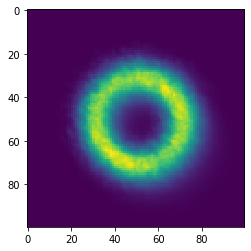

In [61]:
plt.imshow(phi)

In [53]:

# Constants
M = 100         # Grid squares on a side
V = 1.0         # Voltage at top wall
target = 1e-6   # Target accuracy

# Create arrays to hold potential values
phi = np.zeros([M+1,M+1],float)
phi[0,:] = V
#phiprime = empty([M+1,M+1],float)

# Main loop
delta = 1.0
omega = 1.1
while delta>target:

    delta = 0
    # Calculate new values of the potential
    for i in range(1,M):
        for j in range(1,M):
            #if i==0 or i==M or j==0 or j==M:
             #   phiprime[i,j] = phi[i,j]
            #else:
            difference = (phi[i+1,j] + phi[i-1,j] \
                                 + phi[i,j+1] + phi[i,j-1])/4 - phi[i,j]
            phi[i,j] = phi[i,j] + (1+omega)*difference
            if difference>delta: delta = difference
# Make a plot

KeyboardInterrupt: 